# Water Potability Analysis

Safe and readily available water is important for public health, whether it is used for drinking, domestic use, food production or recreational purposes. Improved water supply and sanitation, and better management of water resources, can boost countries’ economic growth and can contribute greatly to poverty reduction.

Contaminated water and poor sanitation are linked to transmission of diseases such as cholera, diarrhoea, dysentery, hepatitis A, typhoid, and polio. Absent, inadequate, or inappropriately managed water and sanitation services expose individuals to preventable health risks. This is particularly the case in health care facilities where both patients and staff are placed at additional risk of infection and disease when water, sanitation, and hygiene services are lacking. Globally, 15% of patients develop an infection during a hospital stay, with the proportion much greater in low-income countries.

In [1]:
!pip install missingno

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import missingno as msno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("water_potability.csv ")

In [5]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

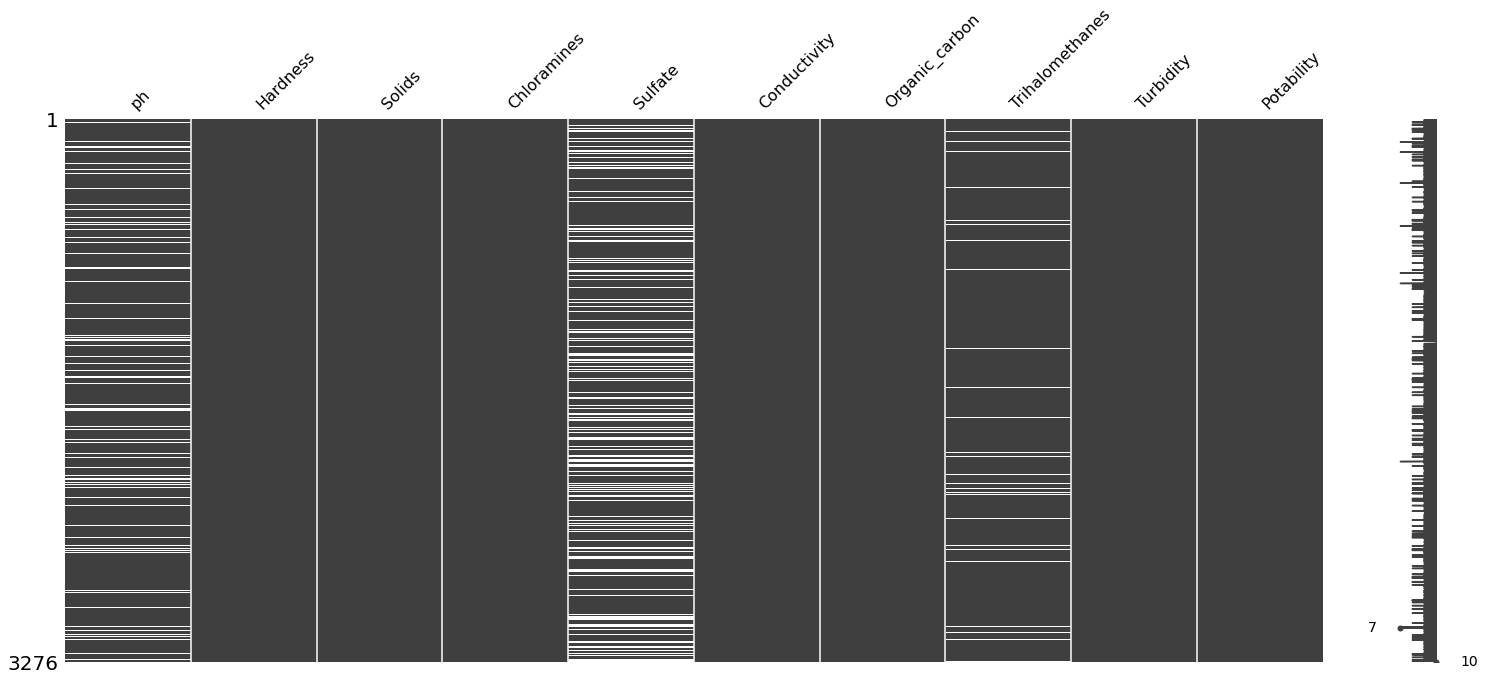

In [8]:
#Plot to visualize the patterns in the missing values
msno.matrix(data)

In [9]:
#Percentage of missing values 
columns=data.columns
print("Percentage of Missing values")
for col in columns:
    if data[col].isnull().sum():
        print("      ",col,": ",data[col].isnull().sum()/len(data))
    


Percentage of Missing values
       ph :  0.14987789987789987
       Sulfate :  0.23840048840048841
       Trihalomethanes :  0.04945054945054945


In [10]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
#The Mean and Median of the pH,Sulfate and Trihalomethanes are almost similar, So replace the missing values with any of these
attributes=['ph','Sulfate','Trihalomethanes']
for col in attributes:
    data[col].fillna(data[col].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


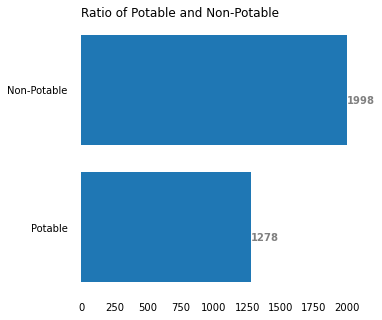

In [12]:
values=[len(data[data['Potability']==0]),len(data[data['Potability']==1])]

# Figure Size
fig, ax = plt.subplots(figsize =(5, 5))
ax.barh(['Non-Potable','Potable'],values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
 # Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Ratio of Potable and Non-Potable',
             loc ='left', )
 

 # Show Plot

plt.show()

In [13]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [14]:
!pip install imblearn

In [15]:
X = data.loc[:, data.columns != 'Potability']
y = data.loc[:, data.columns == 'Potability']

from imblearn.over_sampling import SMOTE
Over_sample = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

Over_sample_data_X, Over_sample_data_y = Over_sample.fit_resample(X_train, y_train)
Over_sample_data_X = pd.DataFrame(data=Over_sample_data_X ,columns=columns )
Over_sample_data_y= pd.DataFrame(data=Over_sample_data_y,columns=['Potability'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(Over_sample_data_X))
print("Number of Non-Potable in oversampled data",len(Over_sample_data_y[Over_sample_data_y['Potability']==0]))

print("Number of Potable in oversampledd data",len(Over_sample_data_y[Over_sample_data_y['Potability']==1]))

print("Proportion of non Potable data in oversampled data is ",len(Over_sample_data_y[Over_sample_data_y['Potability']==0])/len(Over_sample_data_X))
print("Proportion of Potable data in oversampled data is ",len(Over_sample_data_y[Over_sample_data_y['Potability']==1])/len(Over_sample_data_X))

length of oversampled data is  2776
Number of Non-Potable in oversampled data 1388
Number of Potable in oversampledd data 1388
Proportion of non Potable data in oversampled data is  0.5
Proportion of Potable data in oversampled data is  0.5


In [16]:
data=Over_sample_data_X
target=Over_sample_data_y

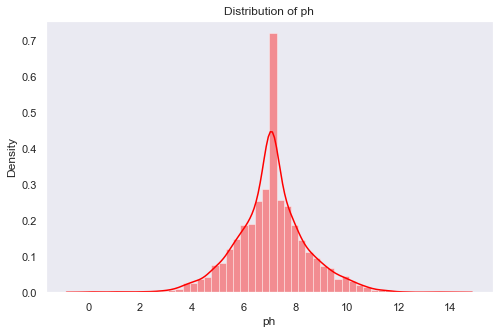

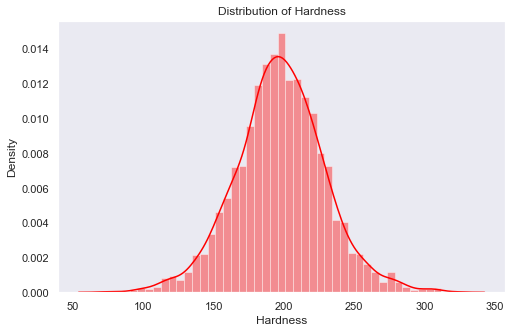

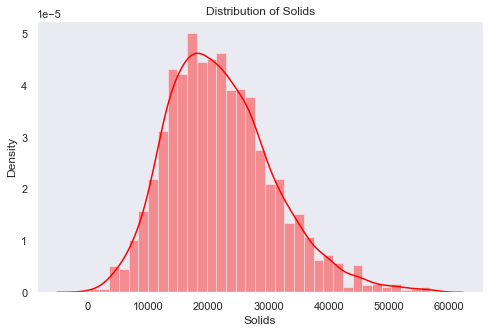

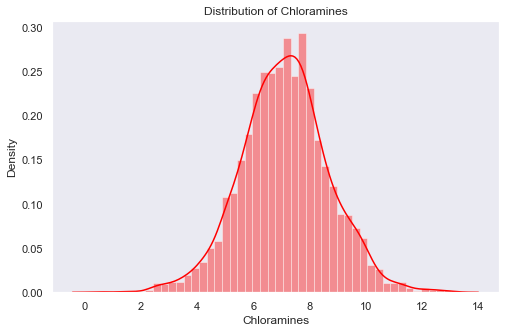

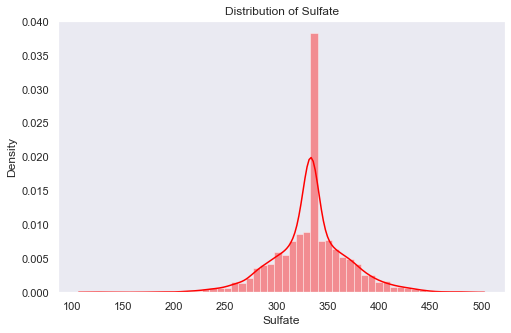

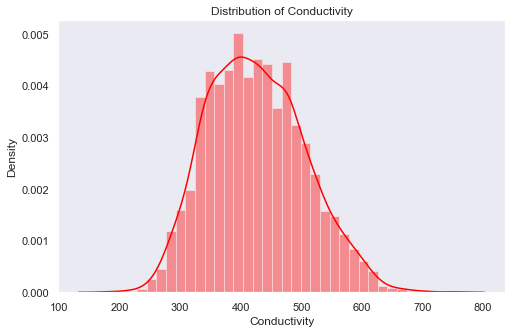

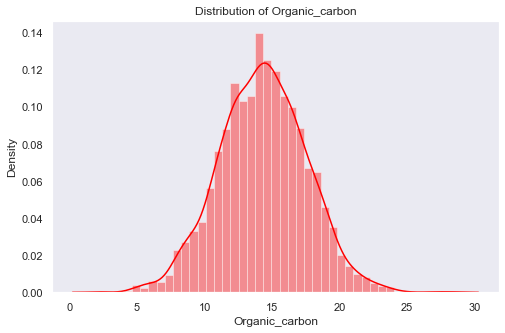

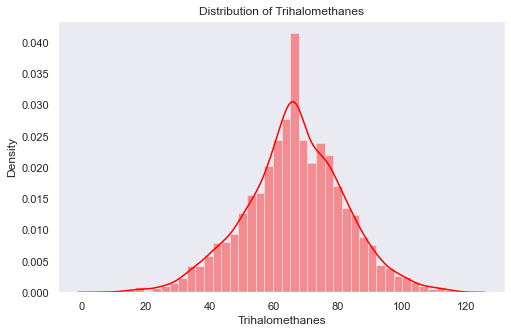

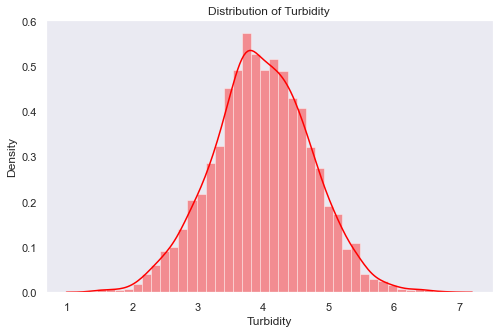

In [17]:
sns.set(style="dark")
rcParams['figure.figsize'] = 8,5
for col in data.columns:
    if col=='Potability':
        continue
    sns.distplot(data[col],kde=True,color='red')
    plt.title("Distribution of {}".format(col))
    plt.show()

## Featue Scalling

In [18]:
#Normalizing the fetures using sklearn minmax scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
data=min_max_scaler.fit_transform(data)
data=pd.DataFrame(data)
print(data)
data.columns=columns

             0         1         2         3         4         5         6  \
0     0.505771  0.570860  0.630451  0.759195  0.573413  0.658597  0.465050   
1     0.652200  0.506907  0.494327  0.556775  0.581699  0.476324  0.408449   
2     0.519796  0.486271  0.317421  0.446845  0.613241  0.386775  0.508036   
3     0.392821  0.628191  0.240190  0.726356  0.633707  0.455852  0.480490   
4     0.505771  0.565816  0.218315  0.524423  0.492831  0.241212  0.507043   
...        ...       ...       ...       ...       ...       ...       ...   
2771  0.416431  0.569979  0.276402  0.559238  0.580970  0.329750  0.590062   
2772  0.478972  0.491110  0.607400  0.429908  0.659604  0.428673  0.402551   
2773  0.515778  0.582328  0.349497  0.572367  0.626119  0.549256  0.376649   
2774  0.493083  0.557453  0.392918  0.577574  0.513357  0.337703  0.505896   
2775  0.328142  0.813078  0.582203  0.362463  0.581699  0.545101  0.393675   

             7         8  
0     0.680327  0.280608  
1     0.5

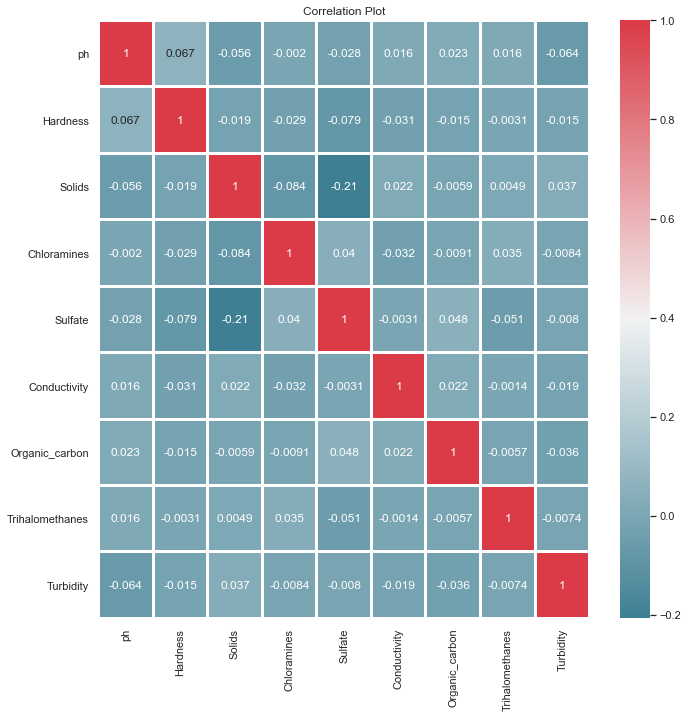

In [19]:
rcParams['figure.figsize'] = 11,11
correlation=data.copy()
sns.heatmap(correlation.corr(),xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True),linewidths=2)
plt.title("Correlation Plot")
plt.show()

In [20]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.505771,0.570860,0.630451,0.759195,0.573413,0.658597,0.465050,0.680327,0.280608
1,0.652200,0.506907,0.494327,0.556775,0.581699,0.476324,0.408449,0.516816,0.297922
2,0.519796,0.486271,0.317421,0.446845,0.613241,0.386775,0.508036,0.635874,0.658225
3,0.392821,0.628191,0.240190,0.726356,0.633707,0.455852,0.480490,0.537431,0.831315
4,0.505771,0.565816,0.218315,0.524423,0.492831,0.241212,0.507043,0.781868,0.672316
...,...,...,...,...,...,...,...,...,...
2771,0.416431,0.569979,0.276402,0.559238,0.580970,0.329750,0.590062,0.631845,0.469528
2772,0.478972,0.491110,0.607400,0.429908,0.659604,0.428673,0.402551,0.535953,0.434396
2773,0.515778,0.582328,0.349497,0.572367,0.626119,0.549256,0.376649,0.379792,0.505610
2774,0.493083,0.557453,0.392918,0.577574,0.513357,0.337703,0.505896,0.492135,0.466791


In [21]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2,shuffle=True)
print(X_train.shape)
print(y_train.shape)

(2220, 9)
(2220, 1)


## Logistic Regression

In [22]:
Accuracy_={}

In [23]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
Accuracy_["Logistic Regression"]=logreg.score(X_test, y_test)*100
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


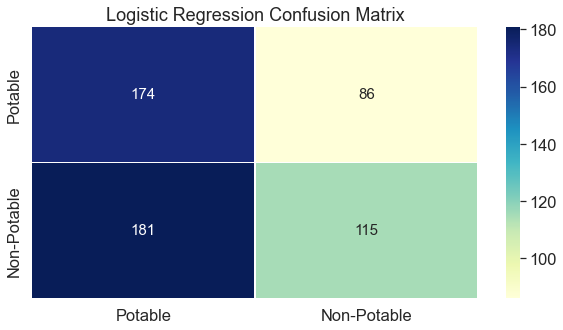

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
rcParams['figure.figsize'] = 10,5
sns.set(font_scale=1.5)
plt.yticks(va='center')
sns.heatmap(confusion_matrix,xticklabels=['Potable','Non-Potable'],yticklabels=['Potable','Non-Potable'],annot=True,cmap='YlGnBu',linewidths=0.5,fmt='d',annot_kws={"size":15})
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## SVM Classifier

In [25]:
svc = svm.SVC(C=2)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
Accuracy_["SVM Classifier"]=svc.score(X_test, y_test)*100
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.64


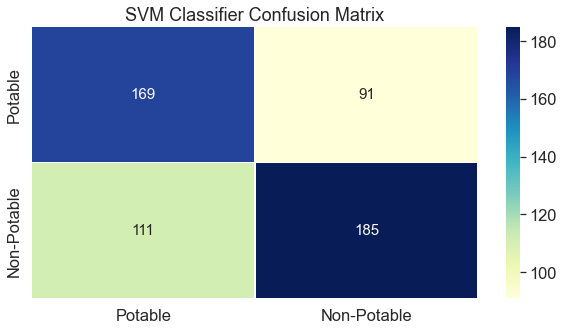

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
rcParams['figure.figsize'] = 10,5
sns.set(font_scale=1.5)
plt.yticks(va='center')
sns.heatmap(confusion_matrix,xticklabels=['Potable','Non-Potable'],yticklabels=['Potable','Non-Potable'],annot=True,cmap='YlGnBu',linewidths=0.5,fmt='d',annot_kws={"size":15})
plt.title("SVM Classifier Confusion Matrix")
plt.show()

## DecisionTreeClassifier()

In [27]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
Accuracy_["Decision Tree"]=DT.score(X_test, y_test)*100
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(DT.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.58


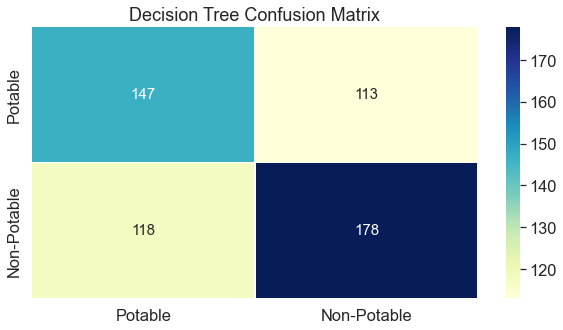

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
rcParams['figure.figsize'] = 10,5
sns.set(font_scale=1.5)
plt.yticks(va='center')
sns.heatmap(confusion_matrix,xticklabels=['Potable','Non-Potable'],yticklabels=['Potable','Non-Potable'],annot=True,cmap='YlGnBu',linewidths=0.5,fmt='d',annot_kws={"size":15})
plt.title("Decision Tree Confusion Matrix")
plt.show()

##  RandomForestClassifier

In [30]:
model_forest= RandomForestClassifier()
grid_forest=GridSearchCV(model_forest,param_grid={'max_depth':range(6,11)})
grid_forest.fit(X_train,y_train)
y_pred = grid_forest.predict(X_test)
Accuracy_["Random Forest"]=grid_forest.score(X_test, y_test)*100
print('Accuracy of Random Forest on test set: {:.2f}'.format(grid_forest.score(X_test, y_test)))

Accuracy of Random Forest on test set: 0.64


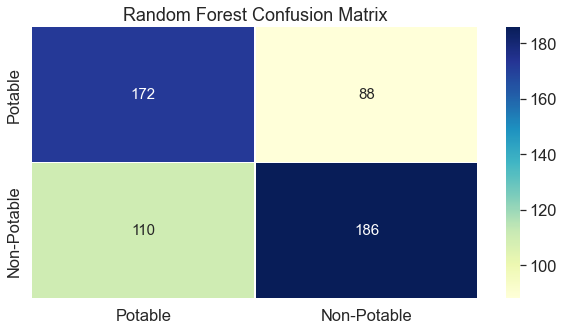

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
rcParams['figure.figsize'] = 10,5
sns.set(font_scale=1.5)
plt.yticks(va='center')
sns.heatmap(confusion_matrix,xticklabels=['Potable','Non-Potable'],yticklabels=['Potable','Non-Potable'],annot=True,cmap='YlGnBu',linewidths=0.5,fmt='d',annot_kws={"size":15})
plt.title("Random Forest Confusion Matrix")
plt.show()

## XG Boost Classifier

In [32]:
model_xgb=XGBClassifier(n_estimators=10)
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
Accuracy_["XG Boost"]=model_xgb.score(X_test, y_test)*100
print('Accuracy of XG Boostt on test set: {:.2f}'.format(model_xgb.score(X_test, y_test)))

[13:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XG Boostt on test set: 0.61


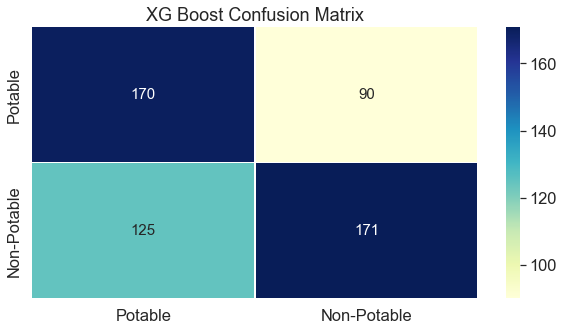

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
rcParams['figure.figsize'] = 10,5
sns.set(font_scale=1.5)
plt.yticks(va='center')
sns.heatmap(confusion_matrix,xticklabels=['Potable','Non-Potable'],yticklabels=['Potable','Non-Potable'],annot=True,cmap='YlGnBu',linewidths=0.5,fmt='d',annot_kws={"size":15})
plt.title("XG Boost Confusion Matrix")
plt.show()

## Ada Boost Classifier

In [34]:
model_adaboost=AdaBoostClassifier(n_estimators=70)
model_adaboost.fit(X_train,y_train)
y_pred = model_adaboost.predict(X_test)
Accuracy_["Ada Boost"]=model_adaboost.score(X_test, y_test)*100
print('Accuracy of Ada Boost on test set: {:.2f}'.format(model_adaboost.score(X_test, y_test)))

Accuracy of Ada Boost on test set: 0.56


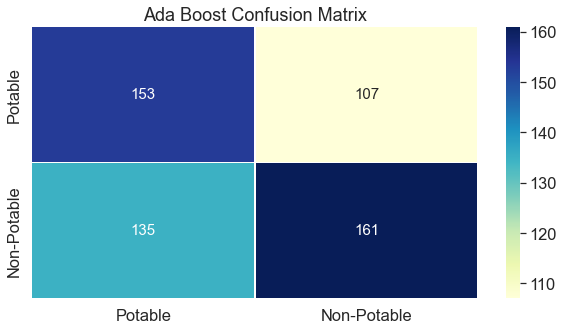

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
rcParams['figure.figsize'] = 10,5
sns.set(font_scale=1.5)
plt.yticks(va='center')
sns.heatmap(confusion_matrix,xticklabels=['Potable','Non-Potable'],yticklabels=['Potable','Non-Potable'],annot=True,cmap='YlGnBu',linewidths=0.5,fmt='d',annot_kws={"size":15})
plt.title("Ada Boost Confusion Matrix")
plt.show()

## KNN Classifier

In [36]:
model_KNN=KNeighborsClassifier()
grid_KNN=GridSearchCV(model_KNN,param_grid={'n_neighbors':range(4,12)})
grid_KNN.fit(X_train,y_train)
y_pred = grid_KNN.predict(X_test)
Accuracy_["KNN Classifier"]=grid_KNN.score(X_test, y_test)*100
print('Accuracy of KNN Classifier on test set: {:.2f}'.format(grid_KNN.score(X_test, y_test)))

Accuracy of KNN Classifier on test set: 0.64


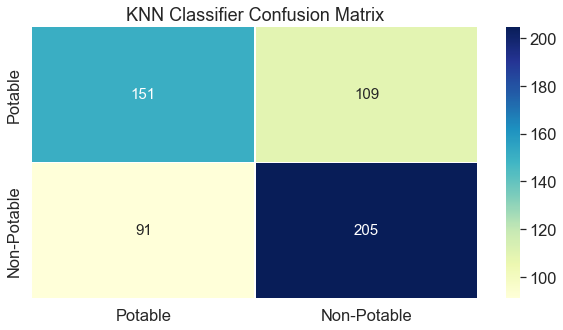

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
rcParams['figure.figsize'] = 10,5
sns.set(font_scale=1.5)
plt.yticks(va='center')
sns.heatmap(confusion_matrix,xticklabels=['Potable','Non-Potable'],yticklabels=['Potable','Non-Potable'],annot=True,cmap='YlGnBu',linewidths=0.5,fmt='d',annot_kws={"size":15})
plt.title("KNN Classifier Confusion Matrix")
plt.show()

## Model Accuracy

In [38]:
print("{:<25} {:<15}".format('Model','Accuracy'))
for k, v in sorted(Accuracy_.items(), key=lambda item :item[1],reverse=True):
    
    print("{:<25} {:<15}".format(k,v))

Model                     Accuracy       
Random Forest             64.38848920863309
KNN Classifier            64.02877697841727
SVM Classifier            63.66906474820144
XG Boost                  61.33093525179856
Decision Tree             58.45323741007194
Ada Boost                 56.4748201438849
Logistic Regression       51.97841726618705


## From the above result its clear that SVM Classifier shows the highest Accuracy.